In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os 
os.getcwd()

'c:\\Users\\Asus\\Documents\\ml\\PIL\\72scenarios'

In [2]:
df1 = pd.read_csv("../better_models/combined_24sce_with_num_AP_STA.csv")
df2 = pd.read_csv("../TPML-WLAN-GAT/RAMON_DATASET.csv")

In [3]:
# df2.iloc[306423]
#append all rows from 306424 row from df1 to df2
df2 = df2.append(df1.iloc[306424:,:], ignore_index=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_5168\3983750205.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append(df1.iloc[306424:,:], ignore_index=True)


In [4]:
df2.shape[0]

382840

In [5]:
df = df2.copy()
# new_df.min_channel_allowed.unique()
# #find the first occurence of min_channel_allowed = 2
# new_df[new_df.min_channel_allowed == 2].index[0]

In [6]:
df.iloc[306425]["throughput"]

12.8

In [7]:
df.head()

,Unnamed: 0.1,Unnamed: 0,node_code,node_type,wlan_code,x(m),y(m),z(m),central_freq(GHz),channel_bonding_model,...,8,9,10,11,wlan_code_index,air_time_mean,deployment,central_freq,num_AP,num_STA
0,0,0,AP_A,0,A,7.5000,8.3333,8.3417,5.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,STA_A1,1,A,12.0627,4.6918,5.0670,5.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,STA_A2,1,A,8.2712,4.8383,9.9676,5.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,3,STA_A3,1,A,8.4824,3.5287,8.9153,5.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,4,STA_A4,1,A,1.3639,1.8250,8.3635,5.0,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.isna().sum()["node_type"]

0

In [9]:
df = df[df.node_type == 0]

In [10]:
df.shape[0]

24000

In [4]:



# def rotate(l, n):
#     return l[-n::] + l[:-n]

# airtime = []
# for idx,val in new_df.iterrows():
#     airtime.append(new_df.at[idx,"airtime_0"])
#     airtime.append(new_df.at[idx,"airtime_1"])
#     airtime.append(new_df.at[idx,"airtime_2"])
#     airtime.append(new_df.at[idx,"airtime_3"])
#     airtime.append(new_df.at[idx,"airtime_4"])
#     airtime.append(new_df.at[idx,"airtime_5"])
#     airtime.append(new_df.at[idx,"airtime_6"])
#     airtime.append(new_df.at[idx,"airtime_7"])
#     airtime=rotate(airtime,new_df.at[idx,"min_channel_allowed"])
#     new_df.at[idx,"airtime_0"] = airtime[0]
#     new_df.at[idx,"airtime_1"] = airtime[1]
#     new_df.at[idx,"airtime_2"] = airtime[2]
#     new_df.at[idx,"airtime_3"] = airtime[3]
#     new_df.at[idx,"airtime_4"] = airtime[4]
#     new_df.at[idx,"airtime_5"] = airtime[5]
#     new_df.at[idx,"airtime_6"] = airtime[6]
#     new_df.at[idx,"airtime_7"] = airtime[7]
#     airtime.clear()



# #rotate the list based on the value of min_channel_allowed
# # for idx,val in new_df.iterrows():






In [60]:
# print(new_df["airtime_0"][97])
# print(new_df["airtime_1"][97])
# print(new_df["airtime_2"][97])
# print(new_df["airtime_3"][97])
# print(new_df["airtime_4"][97])
# print(new_df["airtime_5"][97])
# print(new_df["airtime_6"][97])
# print(new_df["airtime_7"][97])

0.0
0.0
39.52
25.67
0.0
0.0
0.0
0.0


In [11]:
df_ap_tpt = pd.read_csv("../better_models/combined_24sce_with_num_AP_STA.csv")

In [12]:
#read the throughputs from df_ap_tpt where node_type is 0 and add it to each row in df
df_ap_tpt = df_ap_tpt[df_ap_tpt.node_type == 0]
df_ap_tpt.head()

,Unnamed: 0.1,Unnamed: 0,0,1,2,3,4,5,6,7,...,airtime_3,airtime_4,airtime_5,airtime_6,airtime_7,deployment,throughput,central_freq,num_AP,num_STA
0,0,0,0.00,-79.65,-93.86,-109.01,-78.68,-85.30,-98.24,-108.79,...,50.30,0.00,0.00,0.00,0.00,0.0,104.96,5.0,12,10
11,11,11,-76.64,0.00,-75.96,-93.69,-85.25,-78.41,-85.97,-95.24,...,24.50,24.50,24.50,24.50,24.50,0.0,52.05,5.0,12,15
27,27,27,-93.86,-78.97,0.00,-75.94,-98.22,-85.32,-78.93,-82.25,...,19.73,0.00,0.00,0.00,0.00,0.0,40.11,5.0,12,16
44,44,44,-109.01,-96.70,-75.94,0.00,-111.74,-98.29,-85.89,-75.21,...,49.57,32.83,32.83,32.83,32.83,0.0,125.44,5.0,12,12
57,57,57,-78.68,-88.26,-98.22,-111.74,0.00,-76.16,-94.13,-105.87,...,19.76,0.00,0.00,0.00,0.00,0.0,34.13,5.0,12,12


In [13]:
df_ap_tpt.reset_index(inplace=True)

In [14]:
df_ap_tpt.head()

,index,Unnamed: 0.1,Unnamed: 0,0,1,2,3,4,5,6,...,airtime_3,airtime_4,airtime_5,airtime_6,airtime_7,deployment,throughput,central_freq,num_AP,num_STA
0,0,0,0,0.00,-79.65,-93.86,-109.01,-78.68,-85.30,-98.24,...,50.30,0.00,0.00,0.00,0.00,0.0,104.96,5.0,12,10
1,11,11,11,-76.64,0.00,-75.96,-93.69,-85.25,-78.41,-85.97,...,24.50,24.50,24.50,24.50,24.50,0.0,52.05,5.0,12,15
2,27,27,27,-93.86,-78.97,0.00,-75.94,-98.22,-85.32,-78.93,...,19.73,0.00,0.00,0.00,0.00,0.0,40.11,5.0,12,16
3,44,44,44,-109.01,-96.70,-75.94,0.00,-111.74,-98.29,-85.89,...,49.57,32.83,32.83,32.83,32.83,0.0,125.44,5.0,12,12
4,57,57,57,-78.68,-88.26,-98.22,-111.74,0.00,-76.16,-94.13,...,19.76,0.00,0.00,0.00,0.00,0.0,34.13,5.0,12,12


In [21]:
df["throughput"] = df_ap_tpt["throughput"]

In [23]:
df.columns

Index(['sinr_mean', 'sinr_std', 'rssi_mean', 'rssi_std', 'distance_mean',
       'distance_std', 'num_stations', 'airtime_0', 'airtime_1', 'airtime_2',
       'airtime_3', 'airtime_4', 'airtime_5', 'airtime_6', 'airtime_7',
       'throughput'],
      dtype='object')

In [18]:
df = pd.read_csv("../24sceRamon_test_train.csv")

In [19]:
df.shape[0]

24000

In [17]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [22]:
mean_tpt = np.mean(df["throughput"])
max_tpt = np.max(df["throughput"])
min_tpt = np.min(df["throughput"])
print(mean_tpt,max_tpt,min_tpt)

20.68392791666667 256.85 0.0


In [24]:
import torch

In [25]:
df.shape[0]

24000

In [51]:
21120 + 6400/4

22720.0

In [52]:
12*640

7680

In [26]:
#make a dataloader
from sklearn.preprocessing import OneHotEncoder

class Data(torch.utils.data.Dataset):
    def __init__(self,df,num_ap):
        row_val = []
        self.df = df
        self.nump_ap = num_ap
        throughputs = []
        a_list = []
        b_list = []
        j = 0
        k=self.nump_ap

        for i,val in self.df.iterrows():
            # print(i)
            # if i==7680:
            #     k=10
            #     print("hi")
            # if i==14080:
            #     k=8
            #     print("hi again")
            # if i==19200:
            #     k=12
            #     print("12")
            # if i==21120:
            #     k=10
            # if i==22720:
            #     k=8
           
            distance_mean = self.df.at[i,"distance_mean"]
            distance_std = self.df.at[i,"distance_std"]
            sinr_mean = self.df.at[i,"sinr_mean"]
            sinr_std = self.df.at[i,"sinr_std"]
            rssi_mean = self.df.at[i,"rssi_mean"]
            rssi_std = self.df.at[i,"rssi_std"]
            num_stations = self.df.at[i,"num_stations"]
            airtime_0 = self.df.at[i,"airtime_0"]
            airtime_1 = self.df.at[i,"airtime_1"]
            airtime_2 = self.df.at[i,"airtime_2"]
            airtime_3 = self.df.at[i,"airtime_3"]
            airtime_4 = self.df.at[i,"airtime_4"]
            airtime_5 = self.df.at[i,"airtime_5"]
            airtime_6 = self.df.at[i,"airtime_6"]
            airtime_7 = self.df.at[i,"airtime_7"]
            throughput = self.df.at[i,"throughput"]
            a = np.array([distance_mean,distance_std,sinr_mean,sinr_std,rssi_mean,rssi_std,num_stations,airtime_0,airtime_1,airtime_2,airtime_3,airtime_4,airtime_5,airtime_6,airtime_7])
            b = np.array([throughput])
            a_list.append(a)
            b_list.append(b)
            j+=1
            if j==k:
                throughputs.append(b_list)
                row_val.append(a_list)
                j=0
                a_list = []
                b_list = []
            
        self.ap_data = row_val
        self.targets = throughputs

    def __getitem__(self,index):
        ap_data = self.ap_data[index]
        target = self.targets[index]
        
        info = torch.tensor(np.array(ap_data, dtype=np.float32))
        targets = torch.tensor(np.array(target, dtype=np.float32))
        
        # return the features and the target as a tuple
        return (info, targets)

    def __len__(self):
        return len(self.targets)
    


In [27]:
df.head()

,sinr_mean,sinr_std,rssi_mean,rssi_std,distance_mean,distance_std,num_stations,airtime_0,airtime_1,airtime_2,airtime_3,airtime_4,airtime_5,airtime_6,airtime_7,throughput
0,27.009000,27.375253,-64.182000,64.328276,7.816307,8.088183,10.0,50.30,50.30,50.30,50.30,0.00,0.00,0.00,0.00,104.96
1,18.855333,19.499881,-67.495333,67.686723,8.046795,8.382189,15.0,24.50,24.50,24.50,24.50,24.50,24.50,24.50,24.50,52.05
2,23.541875,24.239794,-62.785000,62.937206,7.123930,7.417081,16.0,26.46,19.73,19.73,19.73,0.00,0.00,0.00,0.00,40.11
3,23.649167,23.949777,-64.905000,65.026222,8.161596,8.388810,12.0,63.19,61.84,49.57,49.57,32.83,32.83,32.83,32.83,125.44
4,20.869167,21.748514,-65.165833,65.297246,8.313973,8.564038,12.0,27.15,19.76,19.76,19.76,0.00,0.00,0.00,0.00,34.13


In [28]:
df.reset_index(inplace=True)

In [29]:
type(pd.concat([df[0:7680],df[7680:10000]]))

pandas.core.frame.DataFrame

In [75]:
(19200+21120)/2

20160.0

In [30]:
df.columns

Index(['index', 'sinr_mean', 'sinr_std', 'rssi_mean', 'rssi_std',
       'distance_mean', 'distance_std', 'num_stations', 'airtime_0',
       'airtime_1', 'airtime_2', 'airtime_3', 'airtime_4', 'airtime_5',
       'airtime_6', 'airtime_7', 'throughput'],
      dtype='object')

In [32]:
# data = Data(df)
#concat dataframes example
df1 = pd.concat([df[0:7680],df[19200:21120]])

dfsce3 = pd.concat([df[0:3840],df[19200:20160]])
dfsce4 = pd.concat([df[3840:7680],df[20160:21120]])

df2 = pd.concat([df[7680:14080],df[21120:22720]])

dfsce5 = pd.concat([df[7680:10880],df[21120:21920]])
dfsce6 = pd.concat([df[10880:14080],df[21920:22720]])

df3 = pd.concat([df[14080:19200],df[22720:]])

dfsce7 = pd.concat([df[14080:16640],df[22720:23360]])
dfsce8 = pd.concat([df[16640:19200],df[23360:]])

# data1 = Data(df1)
# data2 = Data(df2)
# data3 = Data(df3)
datasce3 = Data(dfsce3,12)
datasce4 = Data(dfsce4,12)
datasce5 = Data(dfsce5,10)
datasce6 = Data(dfsce6,10)
datasce7 = Data(dfsce7,8)
datasce8 = Data(dfsce8,8)

In [33]:
print(len(dfsce3))
print(len(dfsce4))
print(len(dfsce5))
print(len(dfsce6))
print(len(dfsce7))
print(len(dfsce8))


4800
4800
4000
4000
3200
3200


In [58]:
512+128

640

In [31]:
df.drop(["index"],axis=1,inplace=True)

In [147]:
df.columns

Index(['sinr_mean', 'sinr_std', 'rssi_mean', 'rssi_std', 'distance_mean',
       'distance_std', 'num_stations', 'airtime_0', 'airtime_1', 'airtime_2',
       'airtime_3', 'airtime_4', 'airtime_5', 'airtime_6', 'airtime_7',
       'throughput'],
      dtype='object')

In [34]:
import random

In [35]:
train1_indices = random.sample(range(0, 400), 320)
val1_indices = [i for i in range(0,400) if i not in train1_indices]

train2_indices = random.sample(range(0, 400), 320)
val2_indices = [i for i in range(0,400) if i not in train2_indices]

train3_indices = random.sample(range(0, 400), 320)
val3_indices = [i for i in range(0,400) if i not in train3_indices]

train_4_indices = random.sample(range(0, 400), 320)
val_4_indices = [i for i in range(0,400) if i not in train_4_indices]

train_5_indices = random.sample(range(0, 400), 320)
val_5_indices = [i for i in range(0,400) if i not in train_5_indices]

train_6_indices = random.sample(range(0, 400), 320)
val_6_indices = [i for i in range(0,400) if i not in train_6_indices]

train_SCE3 = torch.utils.data.Subset(datasce3, train1_indices)
validation_SCE3 = torch.utils.data.Subset(datasce3, val1_indices)
train_SCE4 = torch.utils.data.Subset(datasce4, train2_indices)
validation_SCE4 = torch.utils.data.Subset(datasce4, val2_indices)
train_SCE5 = torch.utils.data.Subset(datasce5, train3_indices)
validation_SCE5 = torch.utils.data.Subset(datasce5, val3_indices)
train_SCE6 = torch.utils.data.Subset(datasce6, train_4_indices)
validation_SCE6 = torch.utils.data.Subset(datasce6, val_4_indices)
train_SCE7 = torch.utils.data.Subset(datasce7, train_5_indices)
validation_SCE7 = torch.utils.data.Subset(datasce7, val_5_indices)
train_SCE8 = torch.utils.data.Subset(datasce8, train_6_indices)
validation_SCE8 = torch.utils.data.Subset(datasce8, val_6_indices)

train_loader = torch.utils.data.DataLoader(dataset= torch.utils.data.ConcatDataset((train_SCE3,train_SCE4,train_SCE5,train_SCE6,train_SCE7,train_SCE8)), batch_size=40)
validation_loader = torch.utils.data.DataLoader(dataset= torch.utils.data.ConcatDataset((validation_SCE3,validation_SCE4,validation_SCE5,validation_SCE6,validation_SCE7,validation_SCE8)), batch_size=40)
validation_loader_sce3 = torch.utils.data.DataLoader(dataset= validation_SCE3, batch_size=1)
validation_loader_sce4 = torch.utils.data.DataLoader(dataset= validation_SCE4, batch_size=1)
validation_loader_sce5 = torch.utils.data.DataLoader(dataset= validation_SCE5, batch_size=1)
validation_loader_sce6 = torch.utils.data.DataLoader(dataset= validation_SCE6, batch_size=1)
validation_loader_sce7 = torch.utils.data.DataLoader(dataset= validation_SCE7, batch_size=1)
validation_loader_sce8 = torch.utils.data.DataLoader(dataset= validation_SCE8, batch_size=1)



In [38]:
print(len(train_SCE3))
print(len(train_SCE4))
print(len(train_SCE5))
print(len(train_SCE6))
print(len(train_SCE7))
print(len(train_SCE8))
print(validation_loader_sce3.batch_size)

320
320
320
320
320
320
1


In [39]:
len(train_loader)

48

In [41]:
for batch in validation_loader_sce4:
    print(batch[0][0].shape)

torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([12, 15])
torch.Size([1

# MLP

In [65]:
#print the tensor shapes
1600*12

19200

In [46]:
class MLP_PyTorch(nn.Module):
    def __init__(self):   
        super(MLP_PyTorch, self).__init__()     
        
        self.Linear_sinr = nn.Linear(2, 1)  
        self.Linear_rssi = nn.Linear(2, 1)
        self.Linear_dist = nn.Linear(2, 1)
        self.Linear_signal = nn.Sequential(
            nn.Linear(4, 5),
            nn.PReLU(),
        )
        self.Linear_airtime = nn.Sequential(
            nn.Linear(8, 5),
            nn.PReLU(),
        )
        self.Linear_throughput = nn.Sequential(
            nn.Linear(10,7),
            nn.PReLU(),
            nn.Linear(7,1),
            nn.PReLU(),
        )
        self.norm3 = nn.BatchNorm1d(4)
        self.prelu = nn.ReLU()
        

    # Define the forward pass of the module using the sub-modules declared in the initializer
    def forward(self, X):
        batch_size = X.size(0)
        N_APs = X.size(1)
        n = X[:,:,6,np.newaxis]

        sinr = self.Linear_sinr(X[:,:,:2])
        rssi = self.Linear_rssi(X[:,:,2:4])
        dist = self.Linear_dist(X[:,:,4:6])

        signal = torch.cat((rssi, dist, sinr, n), axis=2)
        signal = self.norm3(torch.flatten(signal,end_dim=1)).reshape(batch_size,N_APs,4)
        signal = self.prelu(signal)
        signal = self.Linear_signal(signal)        

        airtime = self.Linear_airtime(X[:,:,7:])

        throughput = self.Linear_throughput(torch.cat((signal,airtime),axis=2))
        # print(throughput.shape)

        return throughput


In [43]:
df.head()

,sinr_mean,sinr_std,rssi_mean,rssi_std,distance_mean,distance_std,num_stations,airtime_0,airtime_1,airtime_2,airtime_3,airtime_4,airtime_5,airtime_6,airtime_7,throughput
0,27.009000,27.375253,-64.182000,64.328276,7.816307,8.088183,10.0,50.30,50.30,50.30,50.30,0.00,0.00,0.00,0.00,104.96
1,18.855333,19.499881,-67.495333,67.686723,8.046795,8.382189,15.0,24.50,24.50,24.50,24.50,24.50,24.50,24.50,24.50,52.05
2,23.541875,24.239794,-62.785000,62.937206,7.123930,7.417081,16.0,26.46,19.73,19.73,19.73,0.00,0.00,0.00,0.00,40.11
3,23.649167,23.949777,-64.905000,65.026222,8.161596,8.388810,12.0,63.19,61.84,49.57,49.57,32.83,32.83,32.83,32.83,125.44
4,20.869167,21.748514,-65.165833,65.297246,8.313973,8.564038,12.0,27.15,19.76,19.76,19.76,0.00,0.00,0.00,0.00,34.13


In [44]:
df.isna().sum()

sinr_mean        0
sinr_std         0
rssi_mean        0
rssi_std         0
distance_mean    0
distance_std     0
num_stations     0
airtime_0        0
airtime_1        0
airtime_2        0
airtime_3        0
airtime_4        0
airtime_5        0
airtime_6        0
airtime_7        0
throughput       0
dtype: int64

In [45]:
# class MLP_PyTorch(nn.Module):
#     def __init__(self):   
#         super(MLP_PyTorch, self).__init__()     
        
#         self.Linear_sinr = nn.Linear(2, 1)  
#         self.Linear_rssi = nn.Linear(2, 1)
#         self.Linear_dist = nn.Linear(2, 1)
#         self.Linear_signal = nn.Sequential(
#             nn.Linear(4, 5),
#             nn.PReLU(),
#         )
#         self.Linear_airtime = nn.Sequential(
#             nn.Linear(8, 5),
#             nn.PReLU(),
#         )
#         self.Linear_throughput = nn.Sequential(
#             nn.Linear(10,8),
#             nn.PReLU(),
#             nn.Linear(8,1),
#             nn.PReLU(),
#         )
#         self.norm3 = nn.BatchNorm1d(4)
#         self.prelu = nn.ReLU()
        

#     # Define the forward pass of the module using the sub-modules declared in the initializer
#     def forward(self, X):
#         # print(X.shape)
#         batch_size = X.size(0)
#         N_APs = X.size(1)
#         n = X[:,:,6,np.newaxis]

#         sinr = self.Linear_sinr(X[:,:,:2])
#         rssi = self.Linear_rssi(X[:,:,2:4])
#         dist = self.Linear_dist(X[:,:,4:6])

#         signal = torch.cat((rssi, dist, sinr, n), axis=2)
#         signal = self.norm3(torch.flatten(signal,end_dim=1)).reshape(batch_size,N_APs,4)
#         # print(signal.shape)
#         signal = self.prelu(signal)
#         signal = self.Linear_signal(signal)        

#         airtime = self.Linear_airtime(X[:,:,7:])

#         throughput = self.Linear_throughput(torch.cat((signal,airtime),axis=2))
#         # print(throughput.shape)

#         return throughput



In [120]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = "cpu"

In [70]:
# Function to train our MLP with PyTorch
def train_PyTorch(NN, train_loader, validation_loader, criterion,  optimizer = None, num_epochs = 3000, model_name='model_ramon_results_24sce/24sce_3k_2.0.ckpt', device=device):
    train_list_loss = []
    validation_list_loss = [] 
    for epoch in range(num_epochs):        
        loss_avg = 0
        nBatches = 0        
        validation_loss_avg = 0
        validation_nBatches = 0
        
        NN.train()
        for i, (data, targets) in enumerate(train_loader):
            X = data.to(device)
            y = targets.to(device)
            
            # reset optimizer at each epoch
            optimizer.zero_grad()
           
            # make prediction
            yHat = NN.forward(X)

            # compute the loss function
            loss = criterion(yHat,y)
        
            # Backward and optimize
            loss.backward()
            optimizer.step()

            loss_avg += loss.cpu().item()
            nBatches+=1

        NN.eval()
        for i, (data, targets) in enumerate(validation_loader):
            X = data.to(device)
            y = targets.to(device)
            
            # make prediction
            yHat = NN.forward(X)

            # compute the loss function
            loss = criterion(yHat,y)

            validation_loss_avg += loss.cpu().item()
            validation_nBatches+=1


        # Print loss and save the value at each iteration
        if epoch%100 == 0 : 
            print('Loss {} = {} , {}'.format(epoch,loss_avg / nBatches, validation_loss_avg / validation_nBatches))
            torch.save(NN.state_dict(), model_name+f"{epoch}.ckpt")

        train_list_loss.append(loss_avg / nBatches)
        validation_list_loss.append(validation_loss_avg / validation_nBatches)



    print('Loss {} = {} , {}'.format(epoch,loss_avg / nBatches, validation_loss_avg / validation_nBatches))
    torch.save(NN.state_dict(), model_name)
    return train_list_loss, validation_list_loss

Loss 0 = 1146.3837598164876 , 808.0438741048177
Loss 100 = 26.683572153250378 , 26.832237720489502
Loss 200 = 21.465181589126587 , 21.397873282432556
Loss 300 = 20.83288339773814 , 20.595163385073345
Loss 400 = 20.55627829829852 , 20.101541101932526
Loss 500 = 20.26419025659561 , 23.5800674756368
Loss 600 = 20.17997072140376 , 25.156184673309326
Loss 700 = 20.090513557195663 , 20.88814874490102
Loss 800 = 20.02399219075839 , 20.047333637873333
Loss 900 = 19.95159850517909 , 20.041728297869366
Loss 1000 = 19.892676721016567 , 22.7253520488739
Loss 1100 = 19.848668326934177 , 21.425387501716614
Loss 1200 = 19.81727610031764 , 20.854959925015766
Loss 1300 = 19.75169516603152 , 19.734546959400177
Loss 1400 = 19.69970230261485 , 19.78471674521764
Loss 1500 = 19.695171902577084 , 21.640368501345318
Loss 1600 = 19.648434112469356 , 19.67223443587621
Loss 1700 = 19.623841842015583 , 19.88181624809901
Loss 1800 = 19.596038420995075 , 19.63601291179657
Loss 1900 = 19.564344942569733 , 19.6840966

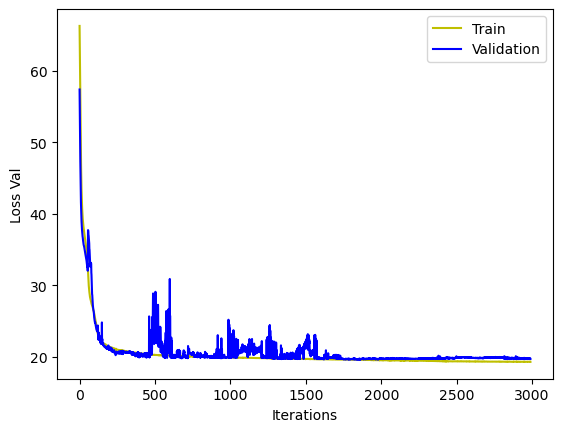

In [71]:
# Initialize a Pytorch MLP
NN = MLP_PyTorch().to(device)

optimizer = torch.optim.Adam(NN.parameters(), lr= 2E-3) 
criterion = nn.MSELoss()

#Train MLP using Pytorch:
train_list_loss, validation_list_loss = train_PyTorch(NN, train_loader, validation_loader, criterion, num_epochs = 3000, optimizer = optimizer, device=device)

# Plot the evolution of the loss function during training
plt.plot(train_list_loss[10:],c='y', label="Train")
plt.plot(validation_list_loss[10:],c='b', label="Validation")
plt.xlabel('Iterations')
plt.ylabel('Loss Val')
plt.legend(loc="upper right")
plt.show()


In [50]:
NN = MLP_PyTorch().to(device)
NN.eval()
NN.load_state_dict(torch.load('24sce_3k_2.0.ckpt'))

<All keys matched successfully>

In [67]:
y_val_sce3 = torch.empty(0)
y_hat_val_sce3 = torch.empty(0)
#calculate rmse for validation1
for i, (data, targets) in enumerate(validation_loader_sce3):
    X = data.to(device)
    y = targets.to(device)
    yHat = NN.forward(X)
    if i == 0:
        y_val_sce3 = y.cpu().numpy().reshape(-1)
        y_hat_val_sce3 = yHat.detach().cpu().numpy( ).reshape(-1)
    else:
        y_val_sce3 = np.concatenate((y_val_sce3, y.detach().cpu().numpy().reshape(-1)), axis=0)
        y_hat_val_sce3 = np.concatenate((y_hat_val_sce3, yHat.detach().cpu().numpy().reshape(-1)), axis=0)

y_val_sce4 = torch.empty(0)
y_hat_val_sce4 = torch.empty(0)
#calculate rmse for validation1
for i, (data, targets) in enumerate(validation_loader_sce4):
    X = data.to(device)
    y = targets.to(device)
    yHat = NN.forward(X)
    if i == 0:
        y_val_sce4 = y.cpu().numpy().reshape(-1)
        y_hat_val_sce4 = yHat.detach().cpu().numpy().reshape(-1)
    else:
        y_val_sce4 = np.concatenate((y_val_sce4, y.detach().cpu().numpy().reshape(-1)), axis=0)
        y_hat_val_sce4 = np.concatenate((y_hat_val_sce4, yHat.detach().cpu().numpy().reshape(-1)), axis=0)

#calculate rmse for validation1
y_val_sce5 = torch.empty(0)
y_hat_val_sce5 = torch.empty(0)
for i, (data, targets) in enumerate(validation_loader_sce5):
    X = data.to(device)
    y = targets.to(device)
    yHat = NN.forward(X)
    if i == 0:
        y_val_sce5 = y.cpu().numpy().reshape(-1)
        y_hat_val_sce5 = yHat.detach().cpu().numpy().reshape(-1)
    else:
        y_val_sce5 = np.concatenate((y_val_sce5, y.detach().cpu().numpy().reshape(-1)), axis=0)
        y_hat_val_sce5 = np.concatenate((y_hat_val_sce5, yHat.detach().cpu().numpy().reshape(-1)), axis=0)

y_val_sce6 = torch.empty(0)
y_hat_val_sce6 = torch.empty(0)
for i, (data, targets) in enumerate(validation_loader_sce6):
    X = data.to(device)
    y = targets.to(device)
    yHat = NN.forward(X)
    if i == 0:
        y_val_sce6 = y.cpu().numpy().reshape(-1)
        y_hat_val_sce6 = yHat.detach().cpu().numpy().reshape(-1)
    else:
        y_val_sce6 = np.concatenate((y_val_sce6, y.detach().cpu().numpy().reshape(-1)), axis=0)
        y_hat_val_sce6 = np.concatenate((y_hat_val_sce6, yHat.detach().cpu().numpy().reshape(-1)), axis=0)

y_val_sce7 = torch.empty(0)
y_hat_val_sce7 = torch.empty(0)
for i, (data, targets) in enumerate(validation_loader_sce7):
    X = data.to(device)
    y = targets.to(device)
    yHat = NN.forward(X)
    if i == 0:
        y_val_sce7 = y.cpu().numpy().reshape(-1)
        y_hat_val_sce7 = yHat.detach().cpu().numpy().reshape(-1)
    else:
        y_val_sce7 = np.concatenate((y_val_sce7, y.detach().cpu().numpy().reshape(-1)), axis=0)
        y_hat_val_sce7 = np.concatenate((y_hat_val_sce7, yHat.detach().cpu().numpy().reshape(-1)), axis=0)

y_val_sce8 = torch.empty(0)
y_hat_val_sce8 = torch.empty(0)
for i, (data, targets) in enumerate(validation_loader_sce8):
    X = data.to(device)
    y = targets.to(device)
    yHat = NN.forward(X)
    if i == 0:
        y_val_sce8 = y.cpu().numpy().reshape(-1)
        y_hat_val_sce8 = yHat.detach().cpu().numpy().reshape(-1)
    else:
        y_val_sce8 = np.concatenate((y_val_sce8, y.detach().cpu().numpy().reshape(-1)), axis=0)
        y_hat_val_sce8 = np.concatenate((y_hat_val_sce8, yHat.detach().cpu().numpy().reshape(-1)), axis=0)

# y_train = y_train.detach().numpy()
# y_hat_train = y_hat_train.detach().numpy()


from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_val_sce3 = []
rmse_val_sce4 = []
rmse_val_sce5 = []
rmse_val_sce6 = []
rmse_val_sce7 = []
rmse_val_sce8 = []
for i in range(0,len(y_val_sce3),12):
    rmse_val = sqrt(mean_squared_error(y_val_sce3[i:i+12], y_hat_val_sce3[i:i+12]))
    rmse_val_sce3.append(rmse_val)
print("Mean RMSE for validation data scenario 3: ", np.mean(rmse_val_sce3))
for i in range(0,len(y_val_sce4),12):
    rmse_val = sqrt(mean_squared_error(y_val_sce4[i:i+12], y_hat_val_sce4[i:i+12]))
    rmse_val_sce4.append(rmse_val)
print("Mean RMSE for validation data scenario 4: ", np.mean(rmse_val_sce4))
for i in range(0,len(y_val_sce5),10):
    rmse_val = sqrt(mean_squared_error(y_val_sce5[i:i+10], y_hat_val_sce5[i:i+10]))
    rmse_val_sce5.append(rmse_val)
print("Mean RMSE for validation data scenario 5: ", np.mean(rmse_val_sce5))
for i in range(0,len(y_val_sce6),10):
    rmse_val = sqrt(mean_squared_error(y_val_sce6[i:i+10], y_hat_val_sce6[i:i+10]))
    rmse_val_sce6.append(rmse_val)
print("Mean RMSE for validation data scenario 6: ", np.mean(rmse_val_sce6))
for i in range(0,len(y_val_sce7),8):
    rmse_val = sqrt(mean_squared_error(y_val_sce7[i:i+8], y_hat_val_sce7[i:i+8]))
    rmse_val_sce7.append(rmse_val)
print("Mean RMSE for validation data scenario 7: ", np.mean(rmse_val_sce7))
for i in range(0,len(y_val_sce8),8):
    rmse_val = sqrt(mean_squared_error(y_val_sce8[i:i+8], y_hat_val_sce8[i:i+8]))
    rmse_val_sce8.append(rmse_val)
print("Mean RMSE for validation data scenario 8: ", np.mean(rmse_val_sce8))




Mean RMSE for validation data scenario 3:  5.156069825174465
Mean RMSE for validation data scenario 4:  4.347835329171308
Mean RMSE for validation data scenario 5:  4.205751436212588
Mean RMSE for validation data scenario 6:  4.072833018450761
Mean RMSE for validation data scenario 7:  2.3757512469478725
Mean RMSE for validation data scenario 8:  3.0268561083487233


In [68]:
from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error for validation data scenario 3: ", mean_absolute_error(y_val_sce3, y_hat_val_sce3))
print("Mean Absolute Error for validation data scenario 4: ", mean_absolute_error(y_val_sce4, y_hat_val_sce4))
print("Mean Absolute Error for validation data scenario 5: ", mean_absolute_error(y_val_sce5, y_hat_val_sce5))
print("Mean Absolute Error for validation data scenario 6: ", mean_absolute_error(y_val_sce6, y_hat_val_sce6))
print("Mean Absolute Error for validation data scenario 7: ", mean_absolute_error(y_val_sce7, y_hat_val_sce7))
print("Mean Absolute Error for validation data scenario 8: ", mean_absolute_error(y_val_sce8, y_hat_val_sce8))

Mean Absolute Error for validation data scenario 3:  3.797812
Mean Absolute Error for validation data scenario 4:  3.167027
Mean Absolute Error for validation data scenario 5:  3.0303104
Mean Absolute Error for validation data scenario 6:  2.7824554
Mean Absolute Error for validation data scenario 7:  1.7255936
Mean Absolute Error for validation data scenario 8:  2.170103


In [69]:
from sklearn.metrics import r2_score
print("R2 score for validation data scenario 3: ", r2_score(y_val_sce3, y_hat_val_sce3))
print("R2 score for validation data scenario 4: ", r2_score(y_val_sce4, y_hat_val_sce4))
print("R2 score for validation data scenario 5: ", r2_score(y_val_sce5, y_hat_val_sce5))
print("R2 score for validation data scenario 6: ", r2_score(y_val_sce6, y_hat_val_sce6))
print("R2 score for validation data scenario 7: ", r2_score(y_val_sce7, y_hat_val_sce7))
print("R2 score for validation data scenario 8: ", r2_score(y_val_sce8, y_hat_val_sce8))


R2 score for validation data scenario 3:  0.9552473724202641
R2 score for validation data scenario 4:  0.9659759985665193
R2 score for validation data scenario 5:  0.963820389966389
R2 score for validation data scenario 6:  0.9585466063932615
R2 score for validation data scenario 7:  0.9803215544271096
R2 score for validation data scenario 8:  0.9791065157048355


In [126]:
## Load, compute predictions.

NN = MLP_PyTorch()
NN.eval()
NN.load_state_dict(torch.load('24sce_3k_2.0.ckpt'))
data_4, target_4 = next(iter(validation_loader))


APs_4_predicted_throughput = NN.forward(data_4)


def print_plot_scenario(predictions, targets, num_of_scen, N_APs):
    results = np.zeros((num_of_scen))
    for i in range(num_of_scen):
        results[i] = criterion(predictions[i], targets[i]).item()
    # print('\n %d APs :\n'%(N_APs), np.sort(results))

    y_test = torch.flatten(targets)
    y_hat_test = torch.flatten(predictions).detach().numpy()
    print('$'*10)
    for i in range(len(y_hat_test)):
        print(y_hat_test[i],y_test[i])
        print("######################################")
    # print(y_test.shape)
    plt.scatter(y_hat_test, y_test, s=2)
    plt.ylabel('Real Throughput')
    plt.xlabel('Predicted Throughput')
    plt.plot(np.arange(350),c='black')
    plt.ylim(0, 350)
    plt.xlim(0, 350)
    plt.show()


4 TOTAL ROOT Mean squared error: 4.75
4 TOTAL Mean squared error: 22.61
$$$$$$$$$$
0.009769621 tensor(0.)
######################################
4.683969 tensor(3.0500)
######################################
19.845776 tensor(20.8300)
######################################
41.789124 tensor(46.9300)
######################################
11.791546 tensor(6.4400)
######################################
0.015178518 tensor(0.)
######################################
0.0012054453 tensor(0.5100)
######################################
2.907979 tensor(2.7700)
######################################
24.809381 tensor(26.6000)
######################################
11.173144 tensor(18.1200)
######################################
15.252342 tensor(18.3100)
######################################
50.917835 tensor(54.5200)
######################################
19.995193 tensor(16.9300)
######################################
9.304948 tensor(10.4500)
######################################
0.031788185 tenso

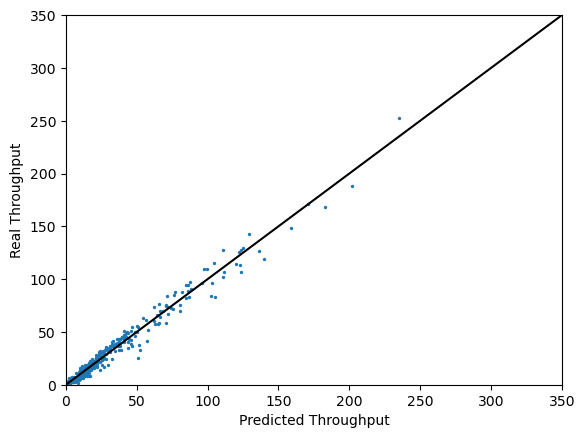

In [127]:
## Compute the MSE of each scenario and plot the predictions.
import math
criterion = nn.MSELoss() 

print("4 TOTAL ROOT Mean squared error: %.2f" % math.sqrt(criterion(APs_4_predicted_throughput,target_4).item()))
print("4 TOTAL Mean squared error: %.2f" % (criterion(APs_4_predicted_throughput,target_4).item()))
print_plot_scenario(APs_4_predicted_throughput, target_4, 40, 4)


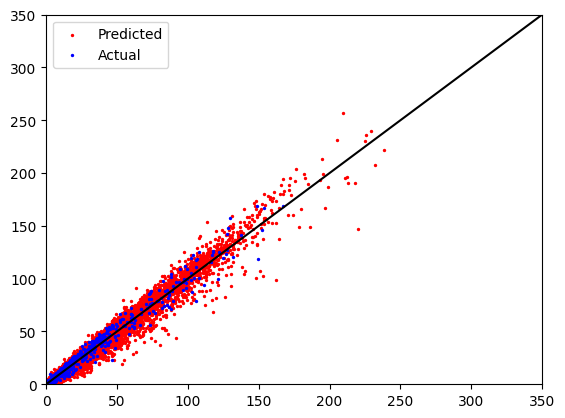

In [80]:
# import matplotlib.pyplot as plt
# import numpy as np

NN = MLP_PyTorch()
NN.eval()
NN.load_state_dict(torch.load('MLP_5k.ckpt'))

y_train = torch.empty(0)
y_hat_train = torch.empty(0)
for x, y in train_loader:
    y_hat_train = torch.cat((y_hat_train, torch.flatten(NN(x))))
    y_train = torch.cat((y_train, torch.flatten(y)))

plt.scatter(y_hat_train.detach(), y_train, s=2, c='r', label="Predicted")  # Changed color to red

x_test, y_test = next(iter(validation_loader))
y_test = torch.flatten(y_test)
y_hat_test = torch.flatten(NN(x_test))
plt.scatter(y_hat_test.cpu().detach(), y_test, s=2, c='b', label="Actual")  # Changed color to blue

plt.plot(np.arange(350), c='black')
plt.ylim(0, 350)
plt.xlim(0, 350)
plt.legend(loc="upper left")
plt.show()
